In [1]:
#https://www.idealista.pt/media/relatorios-preco-habitacao/venda/lisboa/historico/
#Historico de preços

#my user agent
"""Mozilla/5.0 (Windows NT 10.0; Win64; x64)
    AppleWebKit/537.36 (KHTML, like Gecko)
    Chrome/114.0.0.0 Safari/537.36"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# **TODOS BAIRROS**

In [2]:
bairros_link = [
"https://supercasa.pt/comprar-casas/lisboa/santa-clara/",
"https://supercasa.pt/comprar-casas/lisboa/lumiar/",
"https://supercasa.pt/comprar-casas/lisboa/carnide/",
"https://supercasa.pt/comprar-casas/lisboa/benfica/",
"https://supercasa.pt/comprar-casas/lisboa/marvila/",
"https://supercasa.pt/comprar-casas/lisboa/alvalade/",
"https://supercasa.pt/comprar-casas/lisboa/sao-domingos-de-benfica/",
"https://supercasa.pt/comprar-casas/lisboa/areeiro",
"https://supercasa.pt/comprar-casas/lisboa/avenidas-novas/",
"https://supercasa.pt/comprar-casas/lisboa/campolide/",
"https://supercasa.pt/comprar-casas/lisboa/belem/",
"https://supercasa.pt/comprar-casas/lisboa/ajuda/",
"https://supercasa.pt/comprar-casas/lisboa/alcantara/",
"https://supercasa.pt/comprar-casas/lisboa/campo-de-ourique/",
"https://supercasa.pt/comprar-casas/lisboa/estrela/",
"https://supercasa.pt/comprar-casas/lisboa/santo-antonio/",
"https://supercasa.pt/comprar-casas/lisboa/misericordia/",
"https://supercasa.pt/comprar-casas/lisboa/arroios/",
"https://supercasa.pt/comprar-casas/lisboa/santa-maria-maior/",
"https://supercasa.pt/comprar-casas/lisboa/sao-vicente/",
"https://supercasa.pt/comprar-casas/lisboa/penha-de-franca/",
"https://supercasa.pt/comprar-casas/lisboa/beato/",
"https://supercasa.pt/comprar-casas/lisboa/parque-das-nacoes/",
"https://supercasa.pt/comprar-casas/lisboa/olivais/"]


bairros_link[23]

'https://supercasa.pt/comprar-casas/lisboa/olivais/'

In [3]:
# "BAIRROS NAMES"

bairros = ["santa-clara", "lumiar", "carnide", "benfica", "marvila", "alvalade", "sao-domingos-de-benfica", "areeiro", "avenidas-novas", "campolide", "belem", "ajuda", "alcantara", "campo-de-ourique", "estrela", "santo-antonio", "misericordia", "arroios", "santa-maria-maior", "sao-vicente", "penha-de-franca", "beato", "parque-das-nacoes", "olivais"]
len(bairros)


24

In [4]:
def get_houses_all (pages, n):
  new_bairro = {}
  count = 0
  #######################################
  url = bairros_link[n]
  response = requests.get(url)

  soup = BeautifulSoup(response.content)



  for page in range(1,pages+1):  #we need to change the url respecting users input
      new_url = f"{url}pagina-{page}"
      r = requests.get(new_url)
      soup = BeautifulSoup(r.content)
      homes = soup.find_all("div", attrs ={"class":"property big-picture"})

      for i in homes: #find intern func
          price = i.find_all("div", attrs={"class": "property-price"})[0].get_text().strip()
          size_text = i.find_all("div", attrs={"class": "property-features"})[0].get_text().strip()
          zone = i.find_all("h2", attrs={"class": "property-list-title"})[0].get_text().strip()


          num_rooms_match = re.search(r'(\d+)\s+quartos', size_text)
          num_rooms = int(num_rooms_match.group(1)) if num_rooms_match else None

          area_match = re.search(r'Área bruta (\d+)\s+m²', size_text)
          area = int(area_match.group(1)) if area_match else None

          terrain_match = re.search(r'Terreno (\d+)\s+m²' , size_text)
          terrain = int(terrain_match.group(1)) if terrain_match else None


          new_bairro[count] = {"Price": price,
                                "Num Rooms": num_rooms,
                                "Area (m²)": area,
                                "Terrain (m²)": terrain,
                                "Zone": zone}
          count += 1



  return pd.DataFrame.from_dict(new_bairro, orient="index")

In [5]:
#RUN ALL NEIG IN PAGE

bairro_dic = {}
for x in range(0,len(bairros)):
  new_bairro = get_houses_all(20,x)
  bairro_dic[bairros[x]] = new_bairro
  bairro_dic[bairros[x]]["district"] = bairros[x]


  # bairro_dic[bairros[x]]["Price"] = new_bairro['Price'].apply(lambda x: int(re.sub(r'\D', '', x)))
  # bairro_dic[bairros[x]]["value_m2"] = round(new_bairro["Price"]/new_bairro["Area (m²)"],2)
  # bairro_dic[bairros[x]]["Area (m²)"]=pd.to_numeric(new_bairro['Area (m²)'], errors="coerce") ###


In [6]:
lista_frames = list(bairro_dic.values())
result = pd.concat(lista_frames)
result

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district
0,234.000 €,3.0,135.0,None,"Apartamento T3 na Rua Barata Feyo, Santa Clara...",santa-clara
1,415.000 €,3.0,116.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
2,287.000 €,NaN,69.0,None,"Apartamento T1 em Santa Clara, Lisboa",santa-clara
3,620.000 €,3.0,147.0,None,"Apartamento T3 em Calçada do Poço, Santa Clara...",santa-clara
4,280.000 €,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
5,375.000 €\r\n \n\n395.000 €\n↓\n5%,3.0,124.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
0,338.000 €,2.0,84.0,NaN,"Apartamento T2 em Lumiar, Lisboa",lumiar
1,450.000 €\r\n \n\n470.000 €\n↓\n4%,4.0,114.0,378.0,"Apartamento T4 em Lumiar, Lisboa",lumiar
2,875.000 €,4.0,179.0,NaN,"Apartamento T4 em Lumiar, Lisboa",lumiar
3,1.175.000 €,5.0,215.0,NaN,Moradia T5 Duplex na Rua Professor Mark Athias...,lumiar


In [7]:
new_data = result
new_data = new_data.drop(new_data[new_data['Price'].str.contains('%')].index)
new_data

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district
2,287.000 €,NaN,69.0,None,"Apartamento T1 em Santa Clara, Lisboa",santa-clara
4,280.000 €,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
2,875.000 €,4.0,179.0,NaN,"Apartamento T4 em Lumiar, Lisboa",lumiar
4,7.500.000 €,5.0,861.0,NaN,"Palacete T5 em Lumiar, Lisboa",lumiar
6,300.000 €,NaN,84.0,NaN,Andar de Moradia na Rua Professor Bento de Jes...,lumiar
7,620.000 €,3.0,150.0,177.0,"Apartamento T3 em Lumiar, Lisboa",lumiar
8,1.995.000 €,5.0,295.0,226.0,"Moradia Geminada T5 em Lumiar, Lisboa",lumiar
10,740.000 €,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar
2,398.000 €,3.0,92.0,None,Apartamento T3 na Rua Conselheiro José Silvest...,carnide
4,6.000.000 €,7.0,NaN,None,"Palacete T7 em Carnide, Lisboa",carnide


In [8]:
new_data['Price'] = new_data['Price'].apply(lambda x: int(re.sub(r'\D', '', x)))
new_data

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district
2,287000,NaN,69.0,None,"Apartamento T1 em Santa Clara, Lisboa",santa-clara
4,280000,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara
2,875000,4.0,179.0,NaN,"Apartamento T4 em Lumiar, Lisboa",lumiar
4,7500000,5.0,861.0,NaN,"Palacete T5 em Lumiar, Lisboa",lumiar
6,300000,NaN,84.0,NaN,Andar de Moradia na Rua Professor Bento de Jes...,lumiar
7,620000,3.0,150.0,177.0,"Apartamento T3 em Lumiar, Lisboa",lumiar
8,1995000,5.0,295.0,226.0,"Moradia Geminada T5 em Lumiar, Lisboa",lumiar
10,740000,3.0,134.0,NaN,"Apartamento T3 em Lumiar, Lisboa",lumiar
2,398000,3.0,92.0,None,Apartamento T3 na Rua Conselheiro José Silvest...,carnide
4,6000000,7.0,NaN,None,"Palacete T7 em Carnide, Lisboa",carnide


In [9]:
new_data["value_m2"] = round(new_data["Price"]/new_data["Area (m²)"],2)
new_data.head()

,Price,Num Rooms,Area (m²),Terrain (m²),Zone,district,value_m2
2,287000,NaN,69.0,None,"Apartamento T1 em Santa Clara, Lisboa",santa-clara,4159.42
4,280000,3.0,91.0,None,"Apartamento T3 em Santa Clara, Lisboa",santa-clara,3076.92
2,875000,4.0,179.0,NaN,"Apartamento T4 em Lumiar, Lisboa",lumiar,4888.27
4,7500000,5.0,861.0,NaN,"Palacete T5 em Lumiar, Lisboa",lumiar,8710.80
6,300000,NaN,84.0,NaN,Andar de Moradia na Rua Professor Bento de Jes...,lumiar,3571.43


In [10]:
new_data = new_data.drop(['Terrain (m²)', 'Zone'], axis=1)
new_data

,Price,Num Rooms,Area (m²),district,value_m2
2,287000,NaN,69.0,santa-clara,4159.42
4,280000,3.0,91.0,santa-clara,3076.92
2,875000,4.0,179.0,lumiar,4888.27
4,7500000,5.0,861.0,lumiar,8710.80
6,300000,NaN,84.0,lumiar,3571.43
7,620000,3.0,150.0,lumiar,4133.33
8,1995000,5.0,295.0,lumiar,6762.71
10,740000,3.0,134.0,lumiar,5522.39
2,398000,3.0,92.0,carnide,4326.09
4,6000000,7.0,NaN,carnide,NaN


In [11]:
new_data['value_m2'].isna().sum()
len(new_data)

677

In [12]:
new_data = new_data.dropna(subset=['value_m2'])
new_data.head()

,Price,Num Rooms,Area (m²),district,value_m2
2,287000,NaN,69.0,santa-clara,4159.42
4,280000,3.0,91.0,santa-clara,3076.92
2,875000,4.0,179.0,lumiar,4888.27
4,7500000,5.0,861.0,lumiar,8710.80
6,300000,NaN,84.0,lumiar,3571.43


In [13]:
new_data.to_excel("district_data.xlsx")

In [14]:
new_data

,Price,Num Rooms,Area (m²),district,value_m2
2,287000,NaN,69.0,santa-clara,4159.42
4,280000,3.0,91.0,santa-clara,3076.92
2,875000,4.0,179.0,lumiar,4888.27
4,7500000,5.0,861.0,lumiar,8710.80
6,300000,NaN,84.0,lumiar,3571.43
7,620000,3.0,150.0,lumiar,4133.33
8,1995000,5.0,295.0,lumiar,6762.71
10,740000,3.0,134.0,lumiar,5522.39
2,398000,3.0,92.0,carnide,4326.09
6,999000,4.0,300.0,carnide,3330.00


In [15]:
new_data.describe().round(2)

,Price,Num Rooms,Area (m²),value_m2
count,545.00,397.00,545.00,545.00
mean,840676.94,2.95,128.61,6502.67
std,768953.35,1.23,89.98,4000.16
min,135000.00,2.00,4.00,441.18
25%,399900.00,2.00,72.00,4772.73
50%,585000.00,3.00,104.00,5891.55
75%,990000.00,3.00,155.00,7482.76
max,7500000.00,12.00,861.00,82475.00


In [16]:
media_por_grupo = new_data.groupby('district')['value_m2'].mean().round(2)
media_por_grupo

district
ajuda                       7066.40
alcantara                   6680.78
alvalade                    5781.98
arroios                     5276.34
avenidas-novas              7050.00
beato                       3621.21
belem                       6441.33
benfica                     5788.53
campo-de-ourique            6499.13
campolide                   6392.93
carnide                     3828.04
estrela                     7049.09
lumiar                      5598.16
marvila                     5560.22
misericordia                7671.73
olivais                     5745.64
parque-das-nacoes          10819.94
penha-de-franca             4993.83
santa-clara                 3618.17
santa-maria-maior           6820.29
santo-antonio               8337.67
sao-domingos-de-benfica     5287.85
sao-vicente                 5621.05
Name: value_m2, dtype: float64

In [17]:
mean_value = new_data['value_m2'].mean().round(2)
mean_value

6502.67

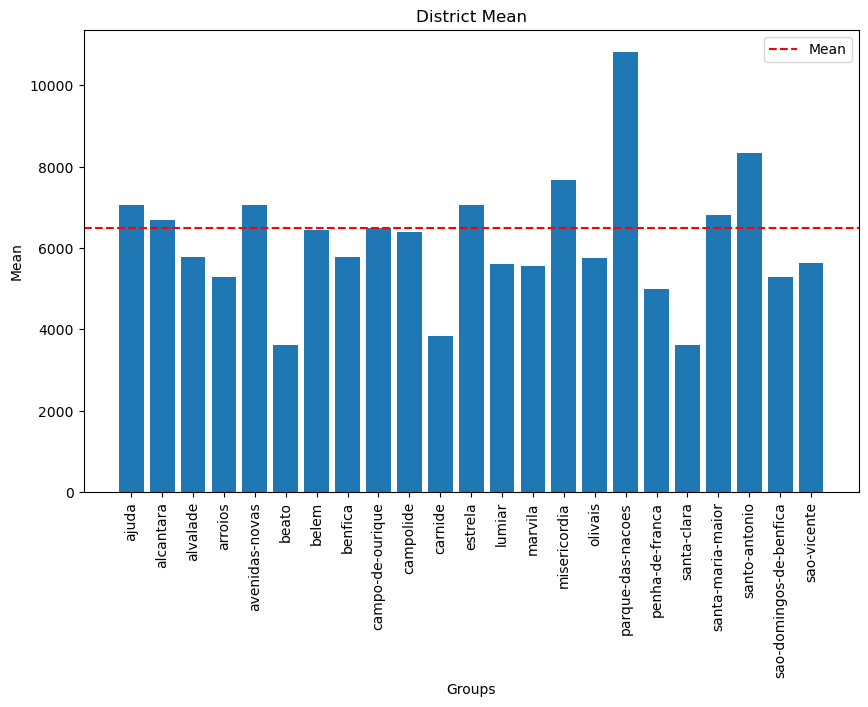

In [18]:

plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.bar(media_por_grupo.index, media_por_grupo.values)
plt.xlabel('Groups')
plt.ylabel('Mean')
plt.title('District Mean')
plt.xticks(rotation=90)

plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.legend()  # Mostrar a legenda com a linha da mediana
plt.savefig("District_Mean.png")
plt.show()

In [19]:
qtd_freg = new_data['district'].value_counts()
contagem = pd.DataFrame(qtd_freg).rename(columns={'index': 'district', 'district': 'value_counts'})
contagem

,value_counts
benfica,74
santo-antonio,45
avenidas-novas,44
arroios,41
estrela,40
sao-vicente,33
penha-de-franca,31
alvalade,30
misericordia,29
campolide,26


In [20]:
house_mean = int(contagem.mean())
house_mean

23

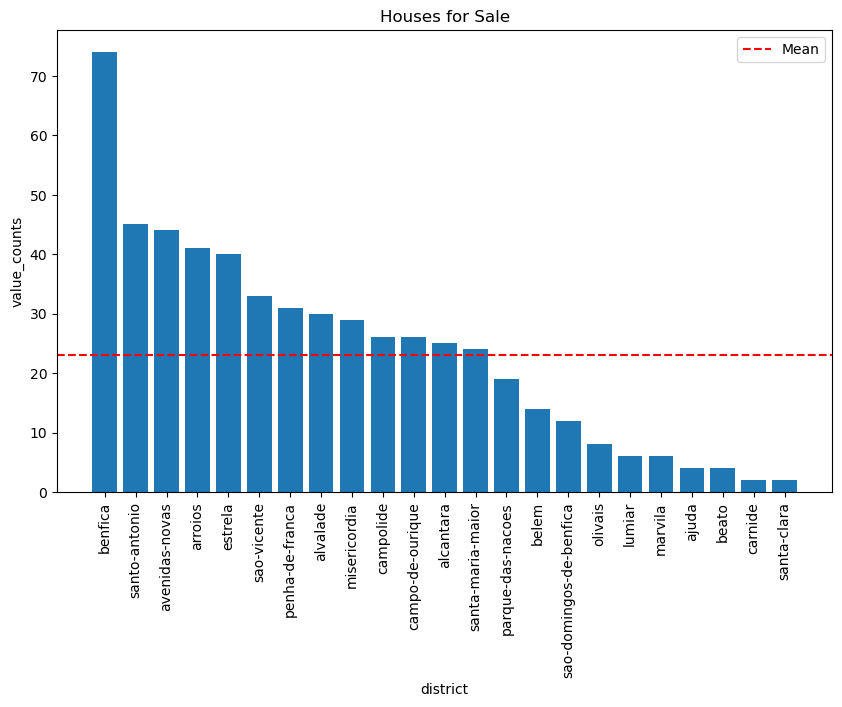

In [21]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.bar(contagem.index, contagem['value_counts'])
plt.xlabel('district')
plt.ylabel('value_counts')
plt.title('Houses for Sale')
plt.xticks(rotation=90)

plt.axhline(house_mean, color='red', linestyle='--', label='Mean')
plt.legend()  # Mostrar a legenda com a linha da mediana
plt.savefig("Houses_for_Sale.png")
plt.show()

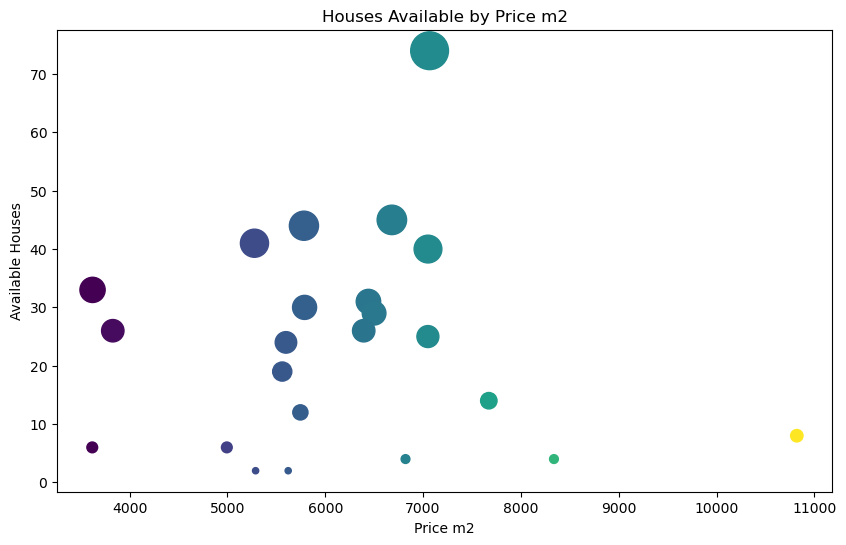

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(media_por_grupo, contagem, s = contagem*10, c = media_por_grupo)
plt.xlabel('Price m2')
plt.ylabel('Available Houses')
plt.title('Houses Available by Price m2')
plt.savefig("number_price.png")

plt.show()

In [29]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Função de inicialização
def init():
    ax.clear()

# Função de atualização para a animação
def atualizar_grafico(frame):
    ax.clear()
    ax.scatter(media_por_grupo[:frame+1], contagem[:frame+1], s=contagem[:frame+1]*10, c=media_por_grupo[:frame+1])
    ax.set_xlabel('Price m2')
    ax.set_ylabel('Available Houses')
    ax.set_title('Houses Available by Price m2')

# Criar a animação
animacao = animation.FuncAnimation(fig, atualizar_grafico, init_func=init, frames=len(media_por_grupo), interval=500, blit=False)

#animacao.save('animacao.gif', writer='imagemagick')  # Descomente esta linha para salvar como um arquivo de GIF

plt.show()

<IPython.core.display.Javascript object>

MovieWriter imagemagick unavailable; using Pillow instead.
